<a href="https://colab.research.google.com/github/mayank5464942/Kaggle-Microsoft-Malware-Prediction/blob/master/kaggle_ms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [0]:
!pip install tensorflow


In [0]:
!pip install kaggle


In [0]:
from google.colab import files
files.upload()

In [0]:
#the kaggle API expects this to be in ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


#this permission changes avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#importing the Dataset
!kaggle  competitions download -c microsoft-malware-prediction


In [0]:
#to view the content of files
!ls


kaggle.json  sample_submission.csv.zip	train.csv.zip
sample_data  test.csv.zip


In [0]:
#for extracting Zip files
from zipfile import ZipFile
file_name='train.csv.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('data extracted')

data extracted


In [0]:
!pip install dask

**CODE STARTED FROM HERE:**

In [0]:
import dask.dataframe as dd

df=dd.read_csv('/content/drive/My Drive/MS_kaggle/train.csv',
                  dtype={'AVProductStatesIdentifier': 'float64', 
                         'AVProductsEnabled':'float64' , 
                         'AVProductsInstalled':'float64' , 
                         'GeoNameIdentifier':'float64' ,
                         'IsProtected':'float64',
                         'PuaMode':'object'})


In [3]:
df.head()

MachineIdentifier  ... HasDetections
0  0000028988387b115f69f31a3bf04f09  ...             0
1  000007535c3f730efa9ea0b7ef1bd645  ...             0
2  000007905a28d863f6d0d597892cd692  ...             0
3  00000b11598a75ea8ba1beea8459149f  ...             1
4  000014a5f00daa18e76b81417eeb99fc  ...             1

[5 rows x 83 columns]

In [0]:
!pip install pandas-profiling

In [0]:
import pandas as pd 
import seaborn as sns
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt 
%matplotlib inline


In [0]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [0]:
pp.ProfileReport(df.compute())

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
df.head()

MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1735.0       0               7.0                 0   
1     4.13.17134.1    1.263.48.0       0               7.0                 0   
2  4.18.1807.18075  1.273.1341.0       0               7.0                 0   
3  4.18.1807.18075  1.273.1527.0       0               7.0                 0   
4  4.18.1807.18075  1.273.1379.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  AVProductsInstalled  \
0                        NaN                    53447.0                  1.0   
1                        NaN                    53447.0                  1.0   
2                        NaN                    53447.0                  1.0   
3                        NaN                    53447.0                  1.0   
4                        NaN                    53447.0                  1.0   

   AVProductsEnabled  HasTpm  CountryIdentifier  CityIdentifier  \
0                1.0       1                 29        128035.0   
1                1.0       1                 93          1482.0   
2                1.0       1                 86        153579.0   
3                1.0       1                 88         20710.0   
4                1.0       1                 18         37376.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          171   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     NaN              117.0                          115   
4                     NaN              277.0                           75   

    Platform Processor     OsVer  OsBuild  OsSuite OsPlatformSubRelease  \
0  windows10       x64  10.0.0.0    17134      256                  rs4   
1  windows10       x64  10.0.0.0    17134      256                  rs4   
2  windows10       x64  10.0.0.0    17134      768                  rs4   
3  windows10       x64  10.0.0.0    17134      256                  rs4   
4  windows10       x64  10.0.0.0    17134      768                  rs4   

                                 OsBuildLab SkuEdition  IsProtected  \
0  17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   
1  17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   
2  17134.1.amd64fre.rs4_release.180410-1804       Home          1.0   
3  17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   
4  17134.1.amd64fre.rs4_release.180410-1804       Home          1.0   

   AutoSampleOptIn PuaMode  SMode  IeVerIdentifier   SmartScreen  Firewall  \
0                0     NaN    0.0            137.0           NaN       1.0   
1                0     NaN    0.0            137.0           NaN       1.0   
2                0     NaN    0.0            137.0  RequireAdmin       1.0   
3                0     NaN    0.0            137.0  ExistsNotSet       1.0   
4                0     NaN    0.0            137.0  RequireAdmin       1.0   

   UacLuaenable Census_MDC2FormFactor Census_DeviceFamily  \
0           1.0               Desktop     Windows.Desktop   
1           1.0              Notebook     Windows.Desktop   
2           1.0               Desktop     Windows.Desktop   
3           1.0               Desktop     Windows.Desktop   
4           1.0              Notebook     Windows.Desktop   

   Census_OEMNameIdentifier  Census_OEMModelIdentifier  \
0              

In [0]:
profile=pp.ProfileReport(df.compute())



/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
profile.to_file(outputfile='H:\Machine Learning\Models\MS_kaggle\kaggle_ms.html')

In [0]:
df.columns


Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [0]:
df.isnull().sum().compute()

In [0]:
#NO. of rows
n=df.shape[0].compute()
print(n)

In [0]:
df.shape

(Delayed('int-07a7af61-9e0b-4a8c-aea3-5f16af81097d'), 83)

In [0]:
#calculating the percentage of Na values column wise
(df.isna().mean().compute().round(4) * 100).sort_values(ascending=False)





PuaMode                                              99.97
Census_ProcessorClass                                99.59
DefaultBrowsersIdentifier                            95.14
Census_IsFlightingInternal                           83.04
Census_InternalBatteryType                           71.05
Census_ThresholdOptIn                                63.52
Census_IsWIMBootEnabled                              63.44
SmartScreen                                          35.61
OrganizationIdentifier                               30.84
SMode                                                 6.03
CityIdentifier                                        3.65
Wdft_IsGamer                                          3.40
Wdft_RegionIdentifier                                 3.40
Census_InternalBatteryNumberOfCharges                 3.01
Census_FirmwareManufacturerIdentifier                 2.05
Census_IsFlightsDisabled                              1.80
Census_FirmwareVersionIdentifier                      1.

In [0]:
#we can drop PuaMode & Census_ProcessorClass


In [0]:
#to be dropped
df['PuaMode'].value_counts().compute()

on       2307
audit       2
Name: PuaMode, dtype: int64

In [0]:
#to be dropped
df['Census_ProcessorClass'].value_counts().compute()

mid     20914
low      9621
high     6096
Name: Census_ProcessorClass, dtype: int64

removing  highly skewed features


In [0]:
#code for highly skewed Feature
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': df[c].nunique(), 'skewness': df[c].value_counts(normalize=True).values[0] * 100} for c in df.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

TypeError: ignored

In [0]:

column	skewness	uniq
75	Census_IsWIMBootEnabled	100.0000	2
5	IsBeta	99.9992	2
69	Census_IsFlightsDisabled	99.9990	2
68	Census_IsFlightingInternal	99.9986	2
27	AutoSampleOptIn	99.9971	2
71	Census_ThresholdOptIn	99.9749	2
29	SMode	99.9537	2
65	Census_IsPortableOperatingSystem	99.9455	2
28	PuaMode	99.9134	2
35	Census_DeviceFamily	99.8383	3
33	UacLuaenable	99.3925	11
76	Census_IsVirtualDevice	99.2961	2

#has to be removed for high skewness

Deleting the Missing values and high skewness columns

In [0]:
cols=['PuaMode',
 'Census_ProcessorClass',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice']
data = df.drop(cols,1)

In [6]:
data.shape

(Delayed('int-947ebeca-5e41-4003-b0cf-087293410067'), 70)

Finding Correlation

In [0]:
data.dtypes

MachineIdentifier                                     object
ProductName                                           object
EngineVersion                                         object
AppVersion                                            object
AvSigVersion                                          object
RtpStateBitfield                                     float64
IsSxsPassiveMode                                       int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                                 int64
CountryIdentifier                                      int64
CityIdentifier                                       float64
OrganizationIdentifier                               float64
GeoNameIdentifier                                    float64
LocaleEnglishNameIdentif

In [31]:
data.shape

(Delayed('int-3b72b0de-7a2a-4501-9b06-7283cf1b4e0d'), 70)

In [0]:
#splitting into Independent and dependent 
indep=data.iloc[:,0:69]
dep=data.iloc[:,69]

In [33]:
indep.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'IeVerIdentifier',
       'SmartScreen', 'Firewall', 'Census_MDC2FormFactor',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
  

Correlation using Filter Methods


In [0]:
#selecting only numeric cells
numeric=indep.select_dtypes(include=np.number)

In [8]:
numeric.shape

(Delayed('int-fd2ab8dd-497a-4181-846d-5214d2343a12'), 42)

In [0]:
numeric['HasDetections']=dep

In [10]:
numeric.shape

(Delayed('int-b74340d9-a17e-46a0-b754-f4c3a9c837ca'), 43)

In [11]:
numeric.head(10)

RtpStateBitfield  IsSxsPassiveMode  ...  Wdft_RegionIdentifier  HasDetections
0               7.0                 0  ...                   10.0              0
1               7.0                 0  ...                    8.0              0
2               7.0                 0  ...                    3.0              0
3               7.0                 0  ...                    3.0              1
4               7.0                 0  ...                    1.0              1
5               7.0                 0  ...                   15.0              1
6               7.0                 0  ...                   10.0              1
7               7.0                 0  ...                   15.0              0
8               7.0                 0  ...                   15.0              0
9               7.0                 0  ...                    8.0              1

[10 rows x 43 columns]

In [0]:
cat=indep.select_dtypes(include='O')

In [13]:
cat.head()

MachineIdentifier  ... Census_FlightRing
0  0000028988387b115f69f31a3bf04f09  ...            Retail
1  000007535c3f730efa9ea0b7ef1bd645  ...           NOT_SET
2  000007905a28d863f6d0d597892cd692  ...            Retail
3  00000b11598a75ea8ba1beea8459149f  ...            Retail
4  000014a5f00daa18e76b81417eeb99fc  ...            Retail

[5 rows x 27 columns]

In [14]:
cat.shape

(Delayed('int-15332654-9d7e-4021-9d82-fb360f8dcf08'), 27)

In [0]:
#removing correlated Features

In [0]:
#removing using corr() Method
corr_features=set()
corr_matrix=numeric.corr()

In [0]:
corr_matrix.compute()

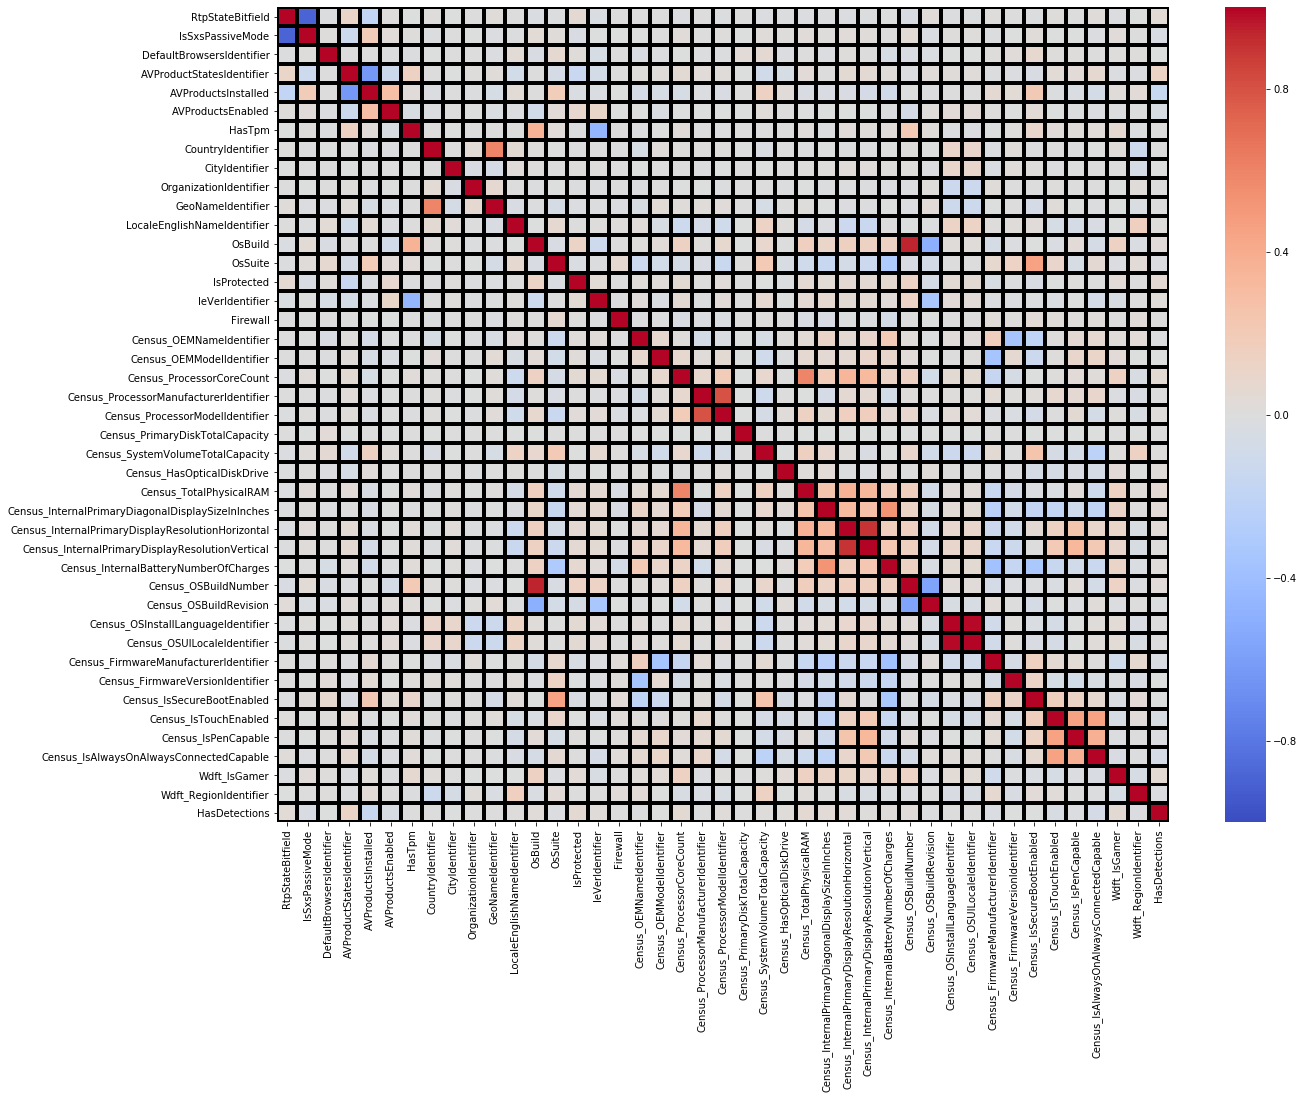

In [0]:
#visualisation
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(20,15))
corr = numeric.corr(method='pearson')
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [15]:
numeric.shape

(Delayed('int-6793ebb3-8247-4aa5-bb4b-95928f9ccb13'), 43)

#working on HIGHLY CORRELATED FEATURES # 0.9 to 1


In [26]:
#to calculate the no. of unique values
print(df['OsBuild'].nunique().compute())
print(df['Census_OSBuildNumber'].nunique().compute())

76
165


In [0]:
#to be dropped
numeric[['OsBuild','Census_OSBuildNumber','HasDetections']].corr(method='pearson').compute()

In [0]:
df[['Census_OSBuildNumber','Census_OSBuildRevision','HasDetections']].corr(method='pearson').compute()

In [0]:
#to be dropped
numeric[['Census_OSUILocaleIdentifier','Census_OSInstallLanguageIdentifier','HasDetections']].corr(method='pearson').compute()

In [0]:
#TO BE DROPPED
df[['Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical','HasDetections']].corr(method='pearson').compute()


*   0.3 to 0.5 positive or negative indicates a weak correlation.

*   0 to 0.3 positive or negative indicates a negligible correlation.




In [0]:
#dropping cols
cols1=['Census_OSBuildNumber','Census_InternalPrimaryDisplayResolutionVertical','Census_OSUILocaleIdentifier']
numeric=numeric.drop(cols1,axis=1)


In [17]:
numeric.shape

(Delayed('int-ff1d43eb-b579-4305-8ae6-f01e669b7acb'), 40)

#Imputing Value




In [45]:
numeric.columns

Index(['RtpStateBitfield', 'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected',
       'IeVerIdentifier', 'Firewall', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildRevision',
       'Census_OSInstallLanguageIdentifier',
       'Census_FirmwareManufacturerIdentifier',
       '

**IMPUATATION Techniques:**



1. Dropping
2. constant number
3. Mean,median,mode
4. KNN
5. MICE

We will have to take care of "OUTLIER" as they introduce bias in data
>We will mainly use scatter,box &count plot






In [0]:
del_col=[]

In [0]:
numeric['DefaultBrowsersIdentifier'].value_counts().compute()
#95% missing values 
#to be dropped


In [0]:
del_col.append('DefaultBrowsersIdentifier')

In [27]:
del_col

['DefaultBrowsersIdentifier']

In [40]:
numeric['OrganizationIdentifier'].value_counts().compute()

27.0    4196457
18.0    1764175
48.0      63845
50.0      45502
11.0      19436
37.0      19398
49.0      13627
46.0      10974
14.0       4713
32.0       4045
36.0       3909
52.0       3043
33.0       2896
2.0        2595
5.0        1990
40.0       1648
28.0       1591
4.0        1385
10.0       1083
51.0        917
20.0        915
1.0         893
8.0         723
22.0        418
39.0        413
6.0         412
31.0        398
21.0        397
47.0        385
3.0         331
16.0        242
19.0        172
26.0        160
44.0        150
29.0        135
42.0        132
7.0          98
41.0         77
45.0         73
30.0         64
43.0         60
35.0         32
23.0         20
15.0         13
25.0         12
12.0          7
34.0          2
17.0          1
38.0          1
Name: OrganizationIdentifier, dtype: int64

In [38]:
numeric['OrganizationIdentifier'].nunique().compute()

49

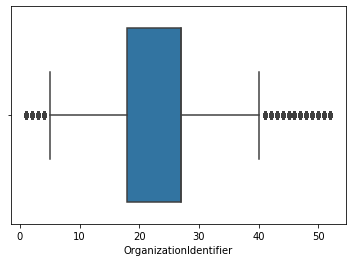

In [31]:
sns.boxplot(x=numeric['OrganizationIdentifier'])
#outliers
#to be replaced by MODE

Conclusion:MODE

---



In [0]:
numeric['CityIdentifier'].value_counts().compute()

In [71]:
numeric['CityIdentifier'].nunique().compute()

107366

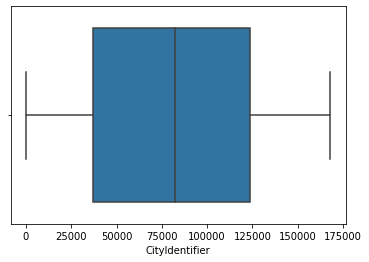

In [48]:
sns.boxplot(x=numeric['CityIdentifier'])

conc.:UN

In [50]:
numeric['Wdft_IsGamer'].value_counts().compute()

0.0    6174143
1.0    2443889
Name: Wdft_IsGamer, dtype: int64

In [46]:
numeric['Wdft_IsGamer'].nunique().compute()

2

Conc.: replace with zeroes

---



In [68]:
print("Unique values:",numeric['Wdft_RegionIdentifier'].nunique().compute())
print("% Missing values:",(numeric['Wdft_RegionIdentifier'.isna().mean().compute().round(4) * 100))
numeric['Wdft_RegionIdentifier'].value_counts().compute()

Unique values: 15


10.0    1800105
11.0    1347828
3.0     1295892
1.0     1232258
15.0    1017591
7.0      597297
8.0      276029
13.0     225130
5.0      205372
12.0     163711
6.0      158163
4.0      135567
9.0       79882
2.0       79385
14.0       3822
Name: Wdft_RegionIdentifier, dtype: int64

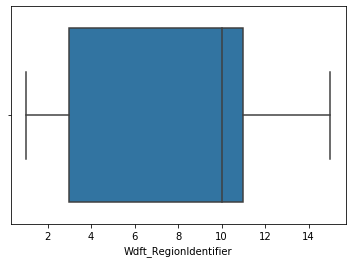

In [69]:
sns.boxplot(numeric['Wdft_RegionIdentifier'])

Conc:Replace with mean or higher

---



In [72]:
print("Unique values:",numeric['Census_InternalBatteryNumberOfCharges'].nunique().compute())
numeric['Census_InternalBatteryNumberOfCharges'].value_counts().compute()

Unique values: 41088


0.000000e+00    5053404
4.294967e+09    2252338
1.000000e+00      53810
2.000000e+00      28128
1.600000e+01      27348
3.000000e+00      21537
3.300000e+01      19723
4.000000e+00      18020
5.000000e+00      16190
6.000000e+00      14472
7.000000e+00      13506
8.000000e+00      12985
9.000000e+00      12020
4.294967e+09      11655
3.740000e+02      11630
1.000000e+01      11518
1.100000e+01      11082
4.380000e+02      10707
1.200000e+01      10561
1.300000e+01       9965
1.400000e+01       9803
3.770000e+02       9716
1.500000e+01       9621
2.560000e+02       9582
2.600000e+01       9243
1.700000e+01       8937
1.800000e+01       8818
3.840000e+02       8691
1.900000e+01       8473
2.000000e+01       8322
2.100000e+01       8194
2.200000e+01       7973
2.300000e+01       7710
4.350000e+02       7667
4.500000e+02       7662
2.500000e+01       7647
2.400000e+01       7414
2.700000e+01       7106
2.800000e+01       6909
3.000000e+01       6859
2.900000e+01       6812
3.100000e+01    

In [0]:
sns.boxplot(numeric['Census_InternalBatteryNumberOfCharges'])


Conc.:Mode or higher

Unique values: 712


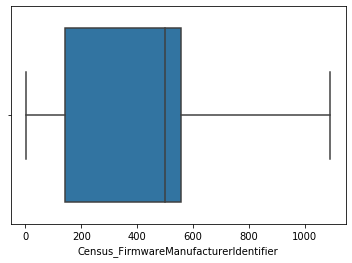

In [75]:
print("Unique values:",numeric['Census_FirmwareManufacturerIdentifier'].nunique().compute())
numeric['Census_FirmwareManufacturerIdentifier'].value_counts().compute()
sns.boxplot(numeric['Census_FirmwareManufacturerIdentifier'])


Conc:Replace with mode

---



Unique values: 50494


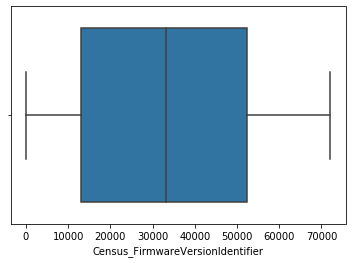

In [77]:
print("Unique values:",numeric['Census_FirmwareVersionIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_FirmwareVersionIdentifier'])

In [76]:
print(numeric['Census_FirmwareVersionIdentifier'].value_counts().compute())


33105.0    89611
33111.0    61583
33054.0    56626
33108.0    55040
11778.0    53785
63175.0    52504
33115.0    50972
63155.0    49074
33060.0    48587
19970.0    46679
33070.0    46168
63122.0    45316
19951.0    44506
19948.0    43279
19973.0    41755
33075.0    41563
33142.0    40841
63140.0    40025
33778.0    39385
20106.0    39167
63317.0    39111
63269.0    39097
33043.0    38640
33000.0    37403
19956.0    36348
19946.0    36270
33135.0    35951
19982.0    35578
63417.0    34561
12536.0    33564
63396.0    33316
63041.0    33075
20050.0    32650
63069.0    32285
63086.0    32261
33041.0    31538
33137.0    31360
33133.0    31059
63103.0    30611
20107.0    30198
33066.0    30061
7145.0     29829
33130.0    29406
33116.0    29346
7271.0     29211
33084.0    29111
12459.0    29102
33015.0    28947
7221.0     28586
6899.0     27935
33103.0    27915
19931.0    27891
4357.0     27719
20317.0    27667
33264.0    27440
33026.0    27273
7759.0     27019
33076.0    26282
3828.0     258

Conc:NO idea

---



In [79]:
print("Unique values:",numeric['Census_OEMModelIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_OEMModelIdentifier'])

OSError: ignored

In [0]:
print(numeric['Census_OEMModelIdentifier'].value_counts().compute())

In [0]:
print("Unique values:",numeric['Census_OEMNameIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_OEMNameIdentifier'])

In [0]:
print(numeric['Census_OEMNameIdentifier'].value_counts().compute())

In [0]:
print("Unique values:",numeric['Firewall'].nunique().compute())
sns.boxplot(numeric['Firewall'])

In [0]:
print(numeric['Firewall'].value_counts().compute())

In [0]:
print("Unique values:",numeric['Census_TotalPhysicalRAM'].nunique().compute())
numeric['Census_TotalPhysicalRAM'].value_counts().compute()
sns.boxplot(numeric['Census_TotalPhysicalRAM'])

In [0]:
print("Unique values:",numeric['Census_IsAlwaysOnAlwaysConnectedCapable'].nunique().compute())
numeric['Census_IsAlwaysOnAlwaysConnectedCapable'].value_counts().compute()
sns.boxplot(numeric['Census_IsAlwaysOnAlwaysConnectedCapable'])

In [0]:
print("Unique values:",numeric['Census_OSInstallLanguageIdentifier'].nunique().compute())
numeric['Census_OSInstallLanguageIdentifier'].value_counts().compute()
sns.boxplot(numeric['Census_OSInstallLanguageIdentifier'])

In [0]:
print("Unique values:",numeric['IeVerIdentifier'].nunique().compute())
numeric['IeVerIdentifier'].value_counts().compute()
sns.boxplot(numeric['IeVerIdentifier'])

In [0]:
print("Unique values:",numeric['Census_SystemVolumeTotalCapacity'].nunique().compute())
numeric['Census_SystemVolumeTotalCapacity'].value_counts().compute()
sns.boxplot(numeric['Census_SystemVolumeTotalCapacity'])

In [0]:
print("Unique values:",numeric['Census_PrimaryDiskTotalCapacity'].nunique().compute())
numeric['Census_PrimaryDiskTotalCapacity'].value_counts().compute()
sns.boxplot(numeric['Census_PrimaryDiskTotalCapacity'])

In [0]:
print("Unique values:",numeric['Census_InternalPrimaryDisplayResolutionHorizontal'].nunique().compute())
numeric['Census_InternalPrimaryDisplayResolutionHorizontal'].value_counts().compute()
sns.boxplot(numeric['Census_InternalPrimaryDisplayResolutionHorizontal'])

In [0]:
print("Unique values:",numeric['Census_InternalPrimaryDiagonalDisplaySizeInInches'].nunique().compute())
numeric['Census_InternalPrimaryDiagonalDisplaySizeInInches'].value_counts().compute()
sns.boxplot(numeric['Census_InternalPrimaryDiagonalDisplaySizeInInches'])

In [0]:
print("Unique values:",numeric['Census_ProcessorCoreCount'].nunique().compute())
numeric['Census_ProcessorCoreCount'].value_counts().compute()
sns.boxplot(numeric['Census_ProcessorCoreCount'])

In [0]:
print("Unique values:",numeric['Census_ProcessorManufacturerIdentifier'].nunique().compute())
numeric['Census_ProcessorManufacturerIdentifier'].value_counts().compute()
sns.boxplot(numeric['Census_ProcessorManufacturerIdentifier'])

In [0]:
print("Unique values:",numeric['Census_ProcessorModelIdentifier'].nunique().compute())
numeric['Census_ProcessorModelIdentifier'].value_counts().compute()
sns.boxplot(numeric['Census_ProcessorModelIdentifier'])

In [0]:
print("Unique values:",numeric['AVProductsEnabled'].nunique().compute())
numeric['AVProductsEnabled'].value_counts().compute()
sns.boxplot(numeric['AVProductsEnabled'])

In [0]:
print("Unique values:",numeric['AVProductsInstalled'].nunique().compute())
numeric['AVProductsInstalled'].value_counts().compute()
sns.boxplot(numeric['AVProductsInstalled'])

In [0]:
print("Unique values:",numeric['AVProductStatesIdentifier'].nunique().compute())
numeric['AVProductStatesIdentifier'].value_counts().compute()
sns.boxplot(numeric['AVProductStatesIdentifier'])

In [0]:
print("Unique values:",numeric['IsProtected'].nunique().compute())
numeric['IsProtected'].value_counts().compute()
sns.boxplot(numeric['IsProtected'])

In [0]:
print("Unique values:",numeric['RtpStateBitfield'].nunique().compute())
numeric['RtpStateBitfield'].value_counts().compute()
sns.boxplot(numeric['RtpStateBitfield'])

In [0]:
(numeric.isna().mean().compute().round(4) * 100).sort_values(ascending=False)


DefaultBrowsersIdentifier                            95.14
OrganizationIdentifier                               30.84
CityIdentifier                                        3.65
Wdft_IsGamer                                          3.40
Wdft_RegionIdentifier                                 3.40
Census_InternalBatteryNumberOfCharges                 3.01
Census_FirmwareManufacturerIdentifier                 2.05
Census_FirmwareVersionIdentifier                      1.79
Census_OEMModelIdentifier                             1.15
Census_OEMNameIdentifier                              1.07
Firewall                                              1.02
Census_TotalPhysicalRAM                               0.90
Census_IsAlwaysOnAlwaysConnectedCapable               0.80
Census_OSInstallLanguageIdentifier                    0.67
IeVerIdentifier                                       0.66
Census_SystemVolumeTotalCapacity                      0.59
Census_PrimaryDiskTotalCapacity                       0.

CORRELATIONS B/W CATEGORICAL VALUES

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


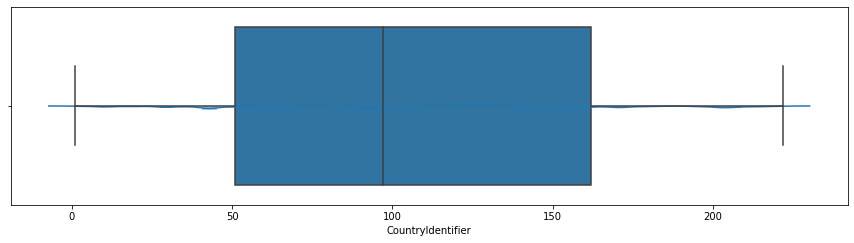

In [55]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(numeric.CountryIdentifier)
plt.subplot(2,1,1)
sns.boxplot(x=numeric.CountryIdentifier)

In [0]:
#adding correlation features greater than 0.8 
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i,j])>0.8:
      col=corr_matrix.columns[i]
      corr_features.add(col)

NotImplementedError: ignored

In [0]:
#variance Threshold #removing constant features
from sklearn.feature_selection import VarianceThreshold
const_filter=VarianceThreshold(0)
const_filter.fit(numeric)


ValueError: ignored

In [0]:
#to get length of non constant feature
len(numeric.columns[const_filter.get_support()])



NotFittedError: ignored

In [0]:
#for constant columns
const_cols=[column for column in numeric.columns if column not in numeric.columns[const_filter.get_support()]]
#lenght of const cols
print(len(const_cols))

NotFittedError: ignored

In [0]:
for column in const_cols:
  print(column)

Removing Quasi Constant features
